In [1]:
import sys
import os

pwd = os.getcwd()
path = pwd
while True:
    try:
        sys.path.append(path)
        from __init__ import *
    except ModuleNotFoundError:
        sys.path.remove(path)
        path = os.path.dirname(path)
    else:
        break
print("pwd:", pwd)

HOME_LOC: /Project/Project/ADMA2024/v0.1
pwd: /Project/Project/ADMA2024/v0.1/CODE/Demo


In [2]:
train_model = MODEL_DICT["default"]
train_method_path = Trainer(model=train_model).method_path

/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [3]:
keys = []
for k in sys.modules.keys():
    if "CODE.Attack.correlation" in k:
        print(k)
        keys.append(k)
for k in keys:
    del sys.modules[k]

from CODE.Attack.correlation import Correlation

attacker = Correlation

Weights not initialized. Attempting to generate weights for visualization.
This is only a demo.


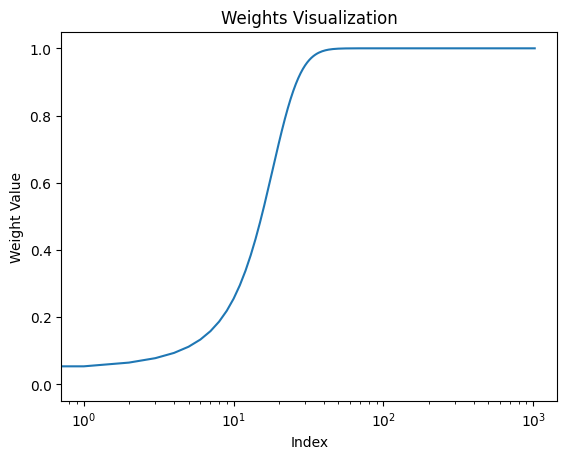

In [4]:
from CODE.Attack.correlation import wcf_S

corr_parameter = {
    "weight_fun": wcf_S,
    "para": {"steepness": 0.2, "midpoint": 0.015},
}
wcf_S(**corr_parameter["para"]).visualize()

In [5]:
# for i, dataset in enumerate(UNIVARIATE_DATASET_NAMES):
#     model = attacker(
#         dataset=dataset,
#         batch_size=96,
#         epoch=100,
#         swap=False,
#         kl_loss=False,
#         CW=True,
#         train_method_path=train_method_path,
#         corr_parameter=corr_parameter,
#         c1=1e-5,
#         c2=1e-9,
#         use_l2=False,
#     )
#     model.out_dir = os.path.join(
#         ATTACK_OUTPUT_PATH,
#         model.train_method_path,
#         model.attack_method_path + "_Correlation",
#         model.dataset,
#     )
#     model.perturb_all(
#         to_device=True,
#         override=False,
#     )
#     print(i, dataset)
#     pprint(model.data)
#     print("-" * 50)

In [ ]:
from CODE.Attack.correlation import wcf_S2
from IPython.display import clear_output as clear
import time

for i in range(1, 100):
    corr_parameter = {
        "weight_fun": wcf_S2,
        "para": {"midpoint": 0.01 * i},
    }
    wcf_S2(**corr_parameter["para"]).visualize(log_scale=False)
    time.sleep(0.2)
    clear()

In [11]:
from CODE.Attack.correlation import wcf_S2
from IPython.display import clear_output as clear

X, Y = [], []


for i, dataset in enumerate(UNIVARIATE_DATASET_NAMES[:]):
    temp_X = log_uniform_random_number(start=1, end=100, num=10)
    temp_Y = []
    for j in temp_X:
        corr_parameter = {
            "weight_fun": wcf_S2,
            "para": {"midpoint": 0.01 * j},
        }
        model = attacker(
            dataset=dataset,
            batch_size=96,
            epoch=100,
            swap=True,
            kl_loss=False,
            CW=False,
            train_method_path=train_method_path,
            corr_parameter=corr_parameter,
            c1=1e-2,
            c2=1e-5,
            use_l2=False,
        )
        model.out_dir = os.path.join(
            ATTACK_OUTPUT_PATH,
            model.train_method_path,
            model.attack_method_path + "_Correlation",
            model.dataset,
        )
        model.perturb_all(
            to_device=False,
            override=False,
        )
        temp_Y.append(model.data["ASR"])
        # print(i, j, dataset)
        # pprint(model.data)
        # print("-" * 50)
    temp_Y = temp_Y / np.max(temp_Y)
    X.extend(temp_X)
    Y.extend(temp_Y)

/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/nump

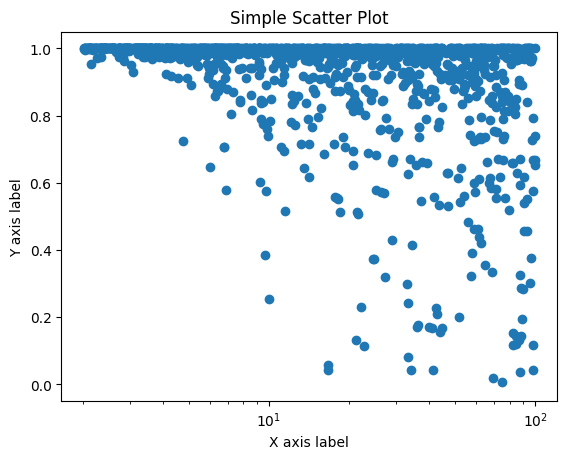

In [14]:
import matplotlib.pyplot as plt

# 绘制散点图
plt.scatter(X, Y)
plt.title("Simple Scatter Plot")
plt.xlabel("X axis label")
plt.ylabel("Y axis label")
plt.ylim(-0.05, 1.05)
plt.xscale("log")
plt.show()

In [18]:
x = np.array(X)
y = np.array(Y)

loc = os.path.join("/Project/Project/ADMA2024/v0.1/OUTPUT", "RAWs", "Plot1")
np.save(os.path.join(loc, "x.npy"), x)
np.save(os.path.join(loc, "y.npy"), y)

In [16]:
ATTACK_OUTPUT_PATH

'/Project/Project/ADMA2024/v0.1/OUTPUT/attack'

In [ ]:
from CODE.Attack.correlation import wcf_S
from IPython.display import clear_output as clear

ALL_Results = 

for dataset in UNIVARIATE_DATASET_NAMES:
    temp_asr_results = []
    for j in range(1, 20):
        corr_parameter = {
            "weight_fun": wcf_S2,
            "para": {"midpoint": 0.01 * (i**2)},
        }
        model = attacker(
            dataset=dataset,
            batch_size=96,
            epoch=100,
            swap=True,
            kl_loss=False,
            CW=False,
            train_method_path=train_method_path,
            corr_parameter=corr_parameter,
            c1=1e-3,
            c2=1e-9,
            use_l2=False,
        )
        model.out_dir = os.path.join(
            ATTACK_OUTPUT_PATH,
            model.train_method_path,
            model.attack_method_path + "_Correlation",
            model.dataset,
        )
        model.perturb_all(
            to_device=False,
            override=False,
        )
        temp_results.append(model.data["ASR"])
        print(i, dataset)
        pprint(model.data)
        print("-" * 50)
    temp_results = temp_results/np.max(temp_results)
    clear()